# Implementing data vis functions

In [1]:
cd ~/Desktop/Repositories/Bioanalysis/bioreactor_results

C:\Users\agilman\Desktop\Repositories\Bioanalysis\bioreactor_results


In [2]:
%run ./BSRplots.py

In [3]:
cd ~/Desktop/process

C:\Users\agilman\Desktop\process


In [4]:
df = pd.read_csv("compiled_data.txt", delimiter = "\t", encoding = 'unicode_escape')
#df = calc_qp(df)

In [5]:
color_legend  = pd.read_csv("color_legend.csv")
legend_key_1 = dict(zip(color_legend["Sample ID"],color_legend["legend_key"]))
color_key = dict(zip(color_legend["Sample ID"],color_legend["color_key"]))

In [13]:
cd ~/Desktop/process/figures

C:\Users\agilman\Desktop\process\figures


In [6]:
list_BSR = ["R0015","R0016", "R0019", "R0020", "R0026"]

"""
[
    "SF1111",
    "SF0002",
    "SF0003",
    "SF0004",
    "SF0005",
    "SF0006",
    "SF0007",
    "SF0008",
    "SF0009",
    "SF0010",
    "SF0011",
    "SF0012"]
"""

#["R0015","R0016", "R0019", "R0020", "R0026"]

#["R0015","R0016", "R0017", "R0018"]             BSR5
#["R0012", "R0013", "R0014", "R0017"]           2x2 comparison with low and high seed inco +/- CB4
#["R0019","R0020","R0021","R0022"]              BSR6

'\n\n[\n    "SF1111",\n    "SF0002",\n    "SF0003",\n    "SF0004",\n    "SF0005",\n    "SF0006",\n    "SF0007",\n    "SF0008",\n    "SF0009",\n    "SF0010",\n    "SF0011",\n    "SF0012"]\n    \n'

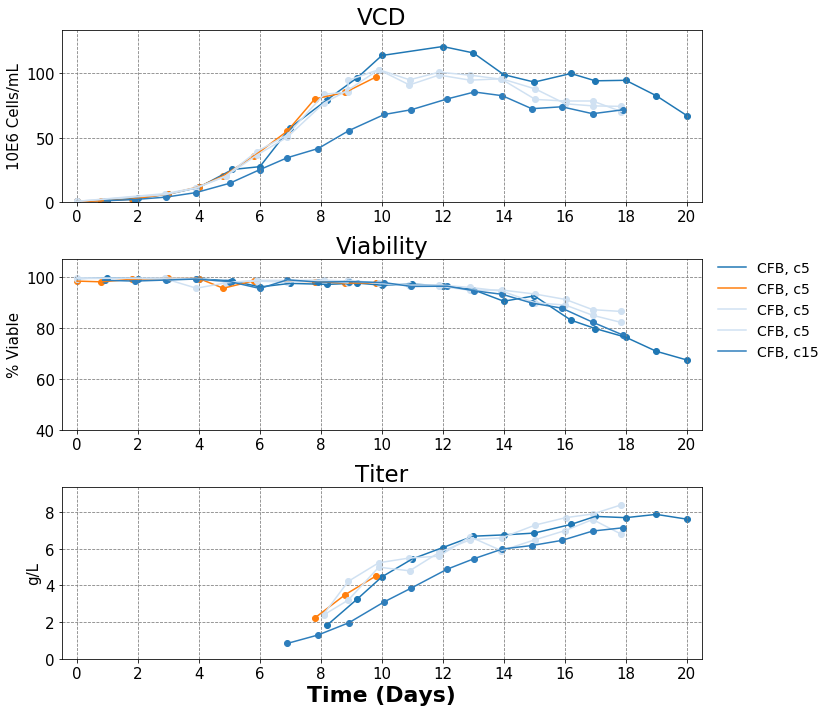

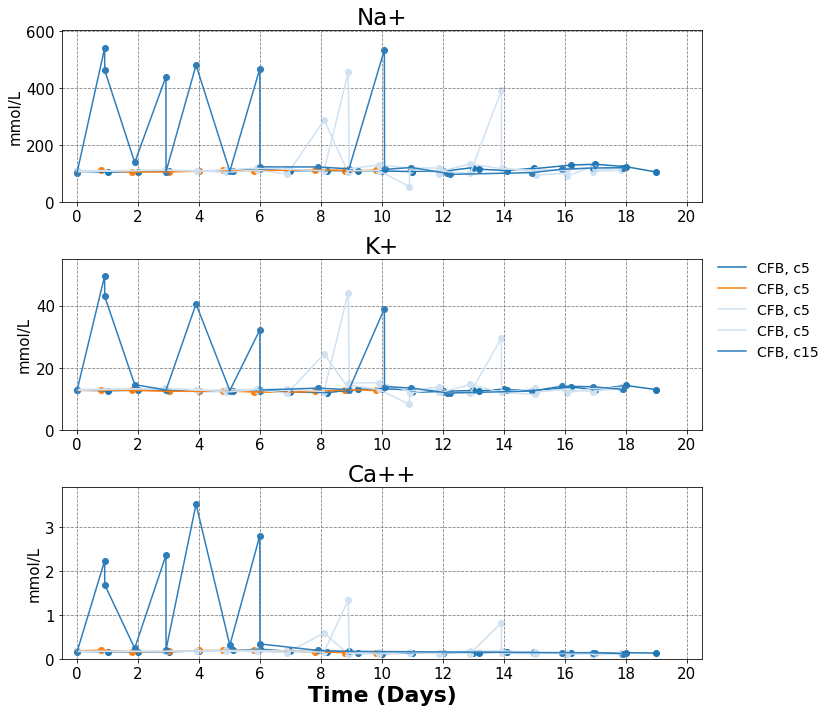

In [9]:
for i in list_3pane:
    plot_3by1(list_BSR, i, df, legend = legend_key_1,color = color_key, xmax = 20)

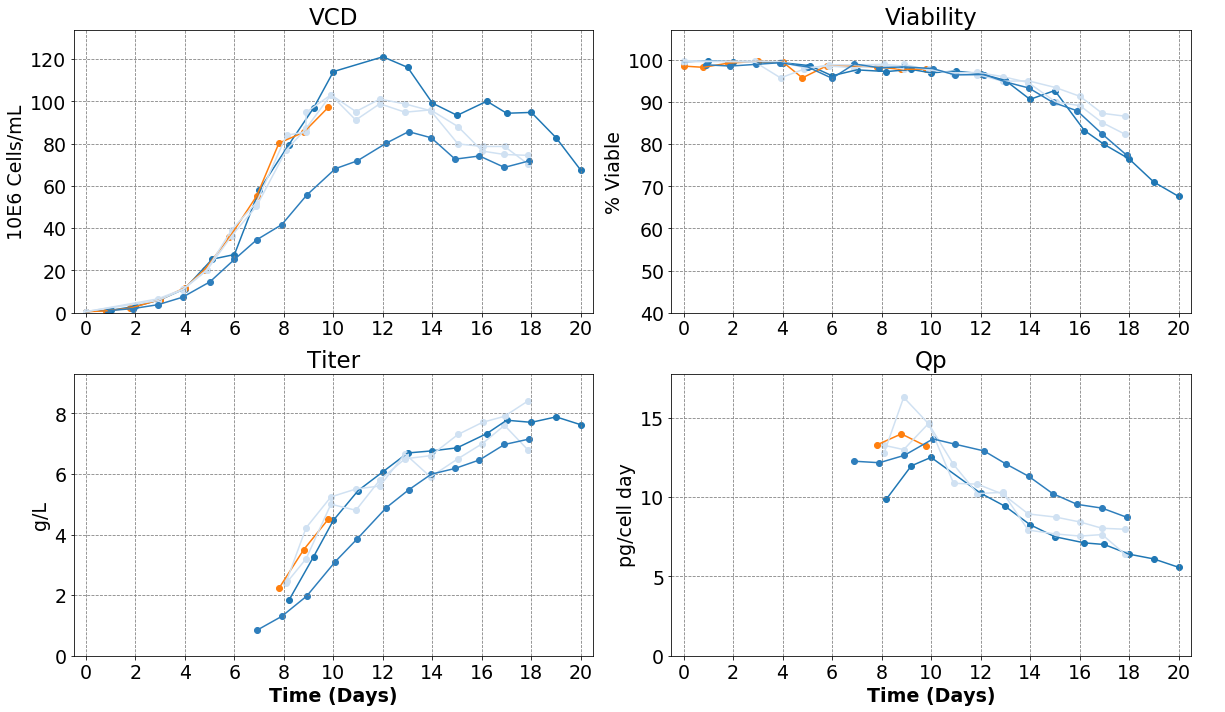

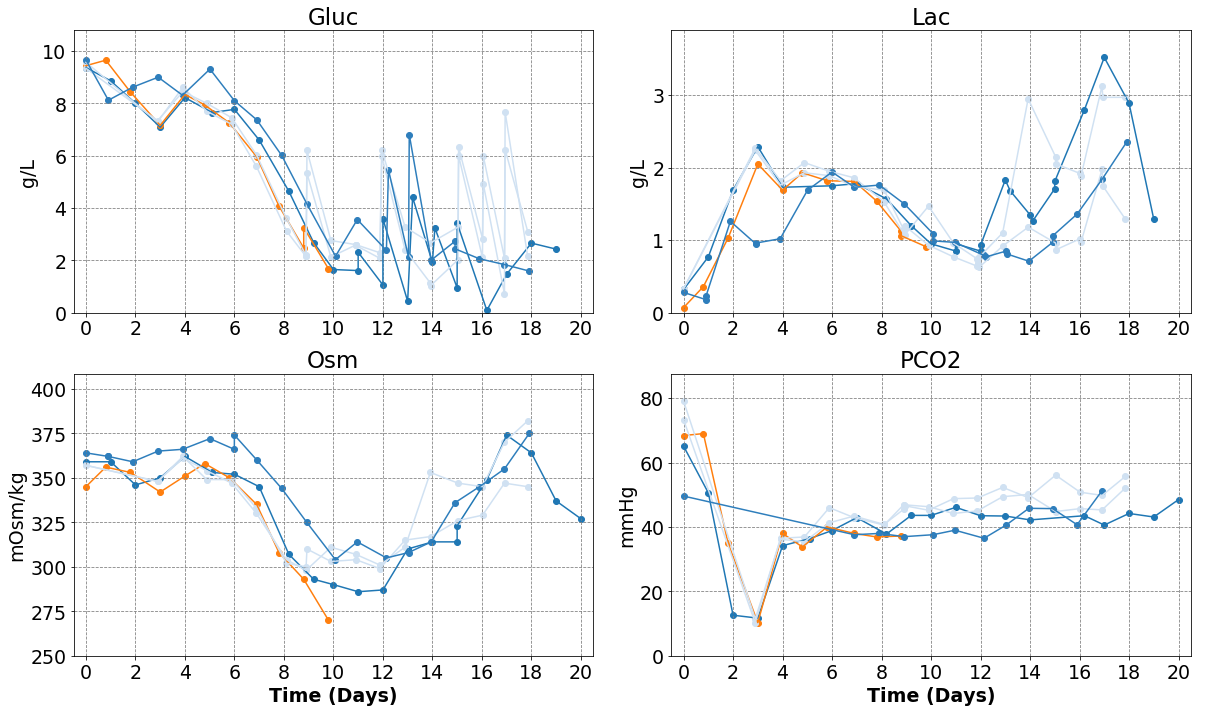

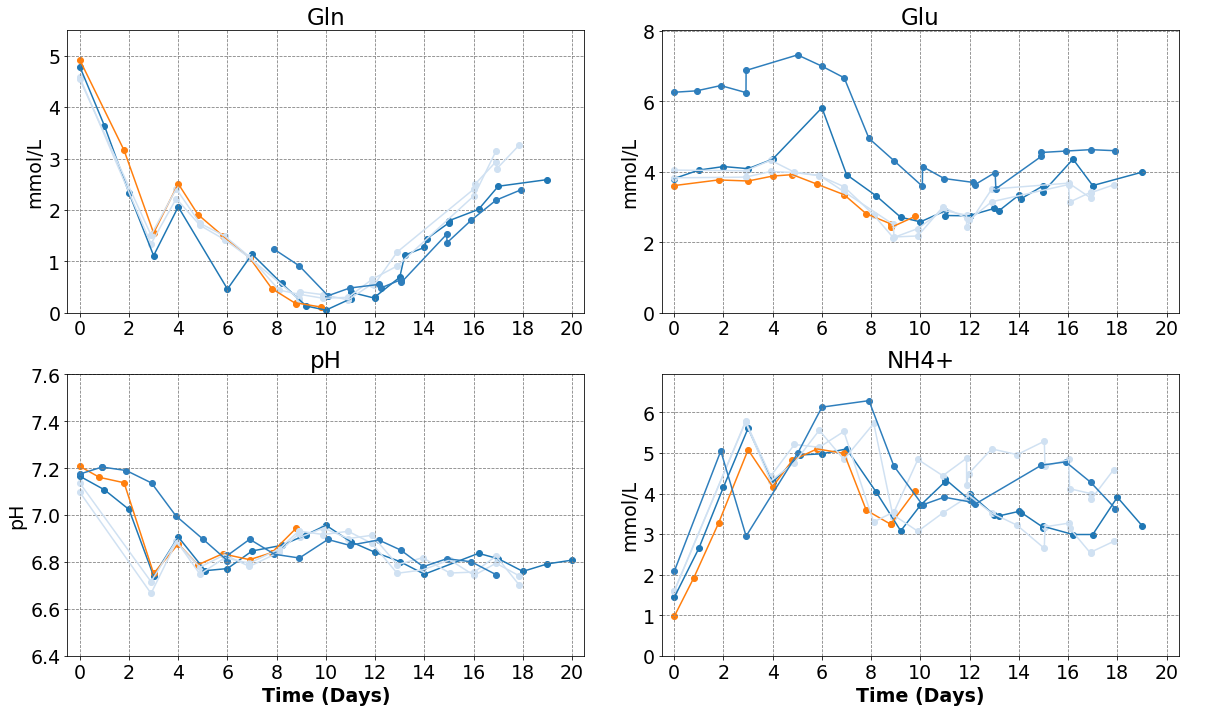

In [8]:
for i in list_4pane:
    plot_2by2(list_BSR, i, df, legend = "no", color = color_key, xmax = 20)

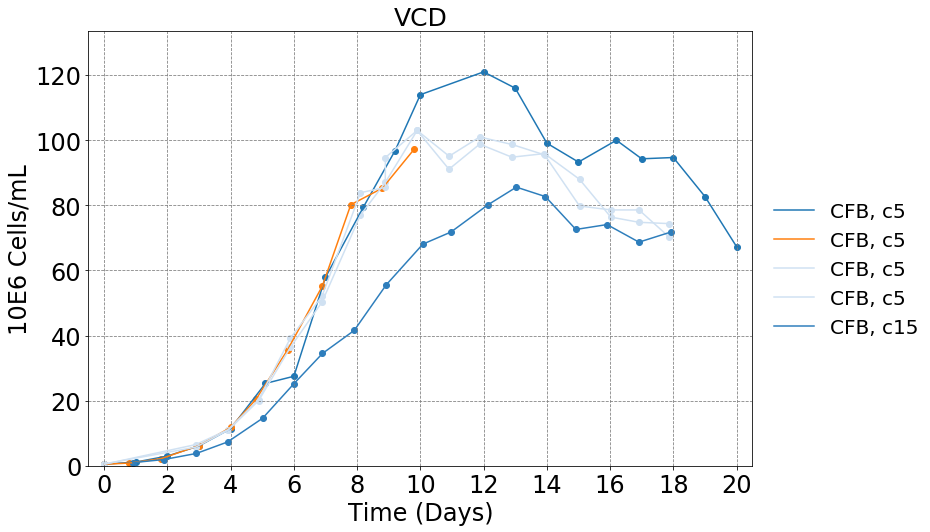

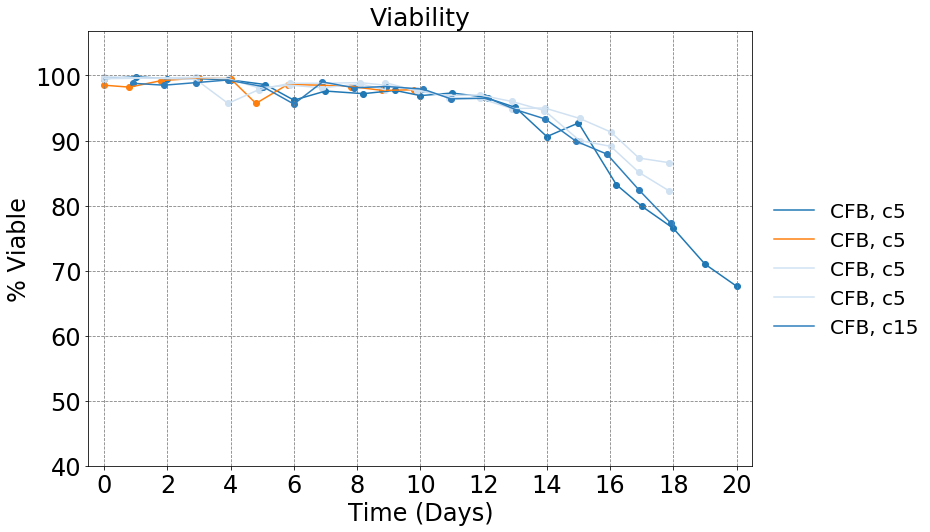

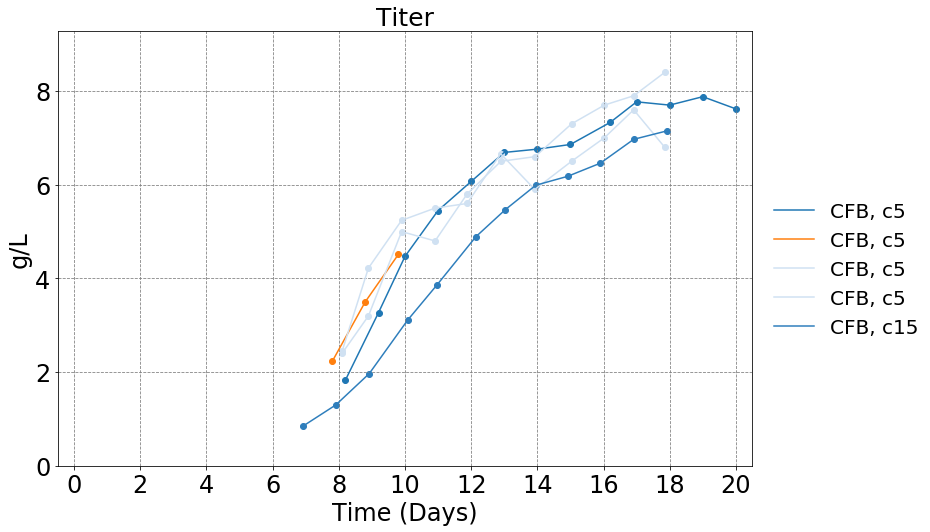

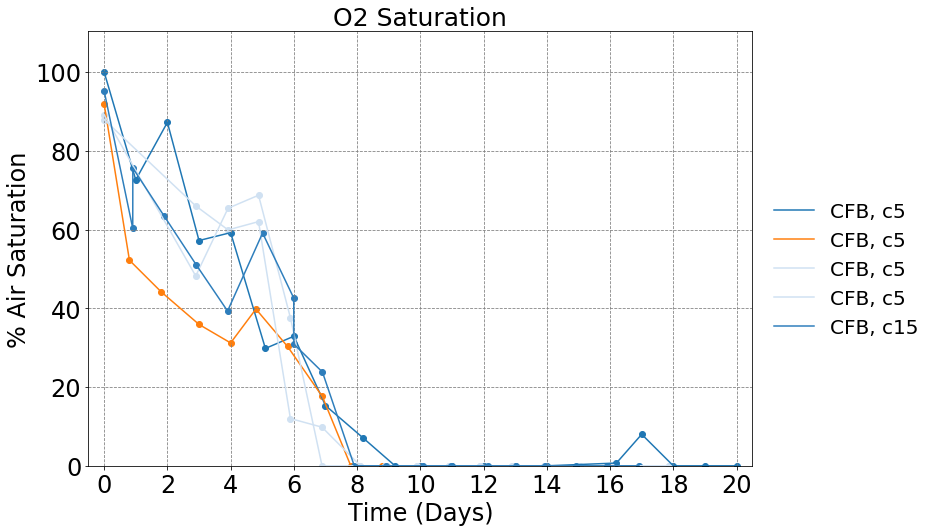

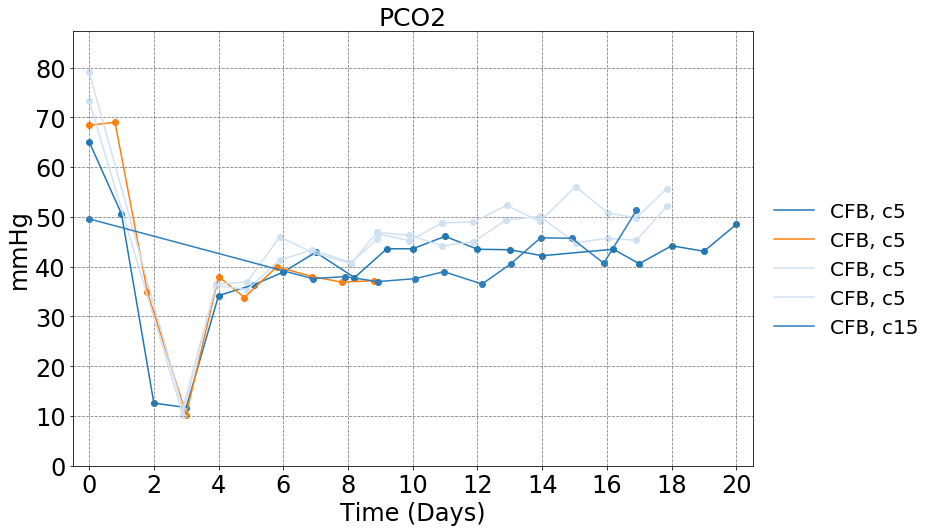

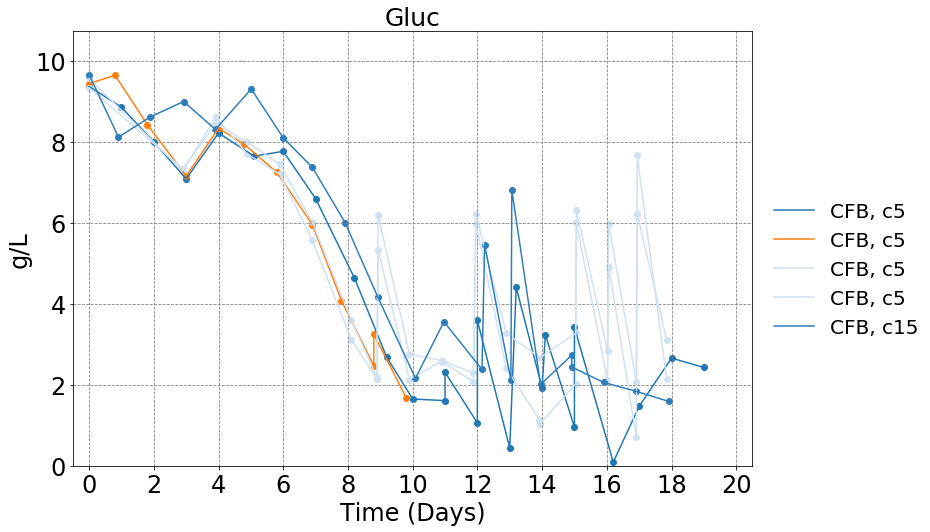

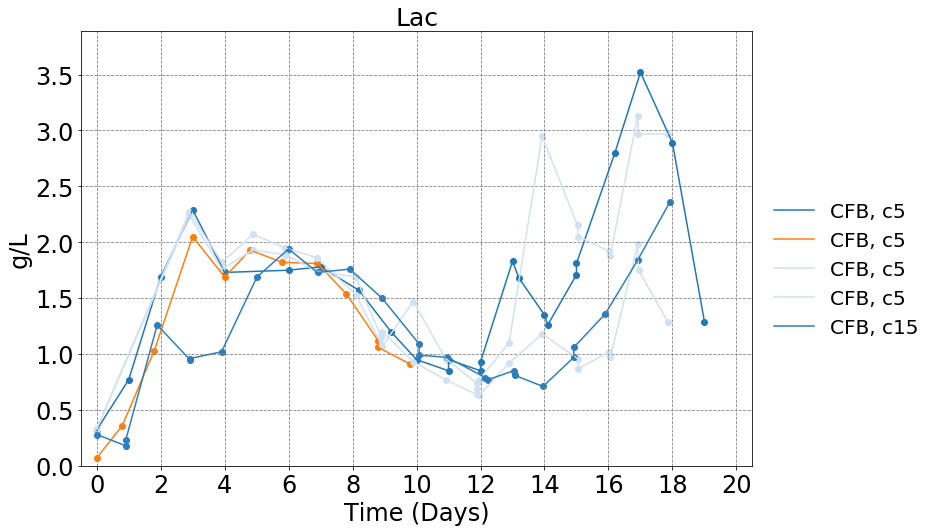

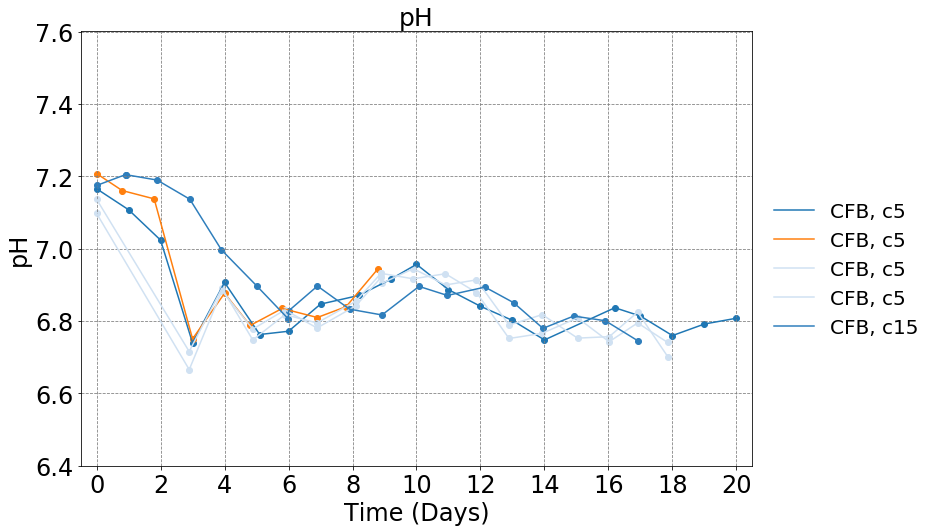

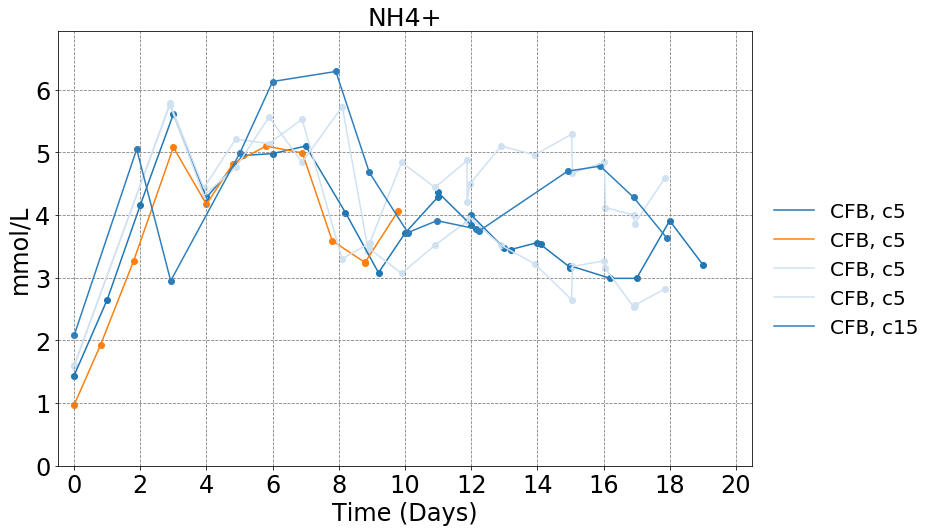

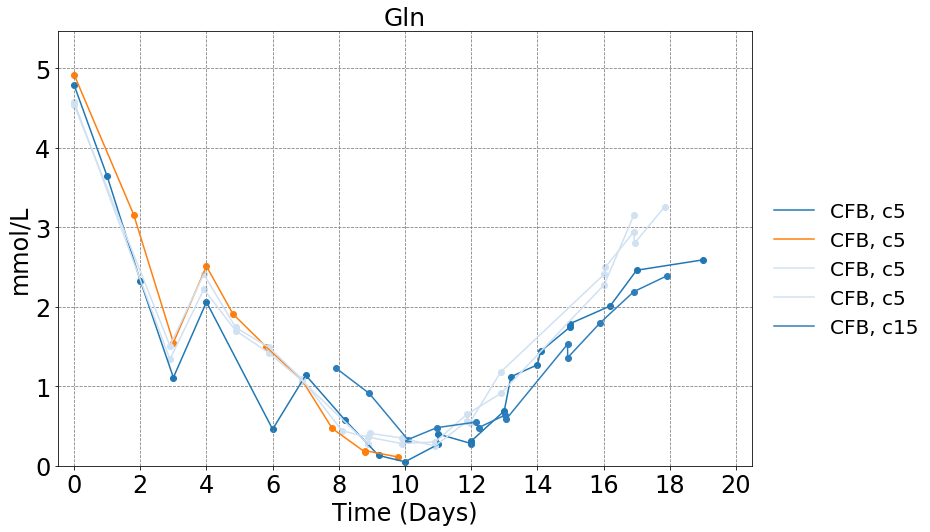

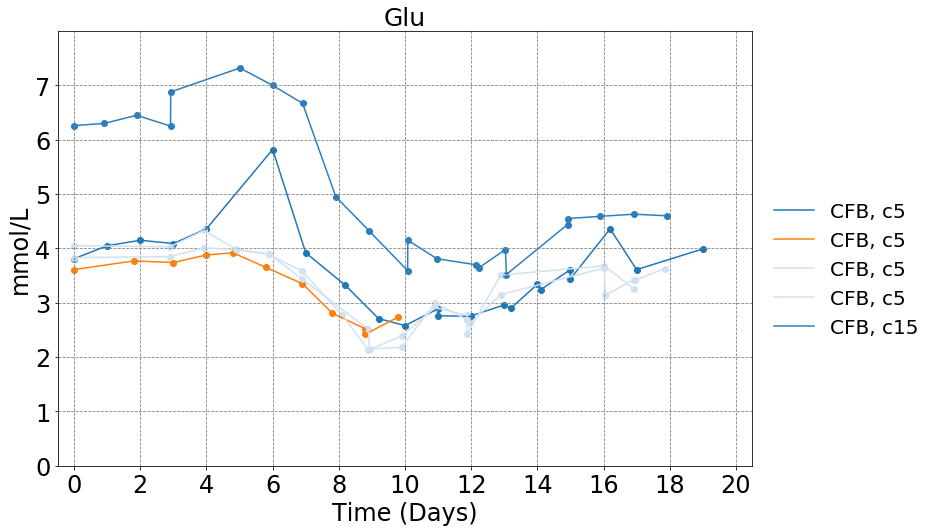

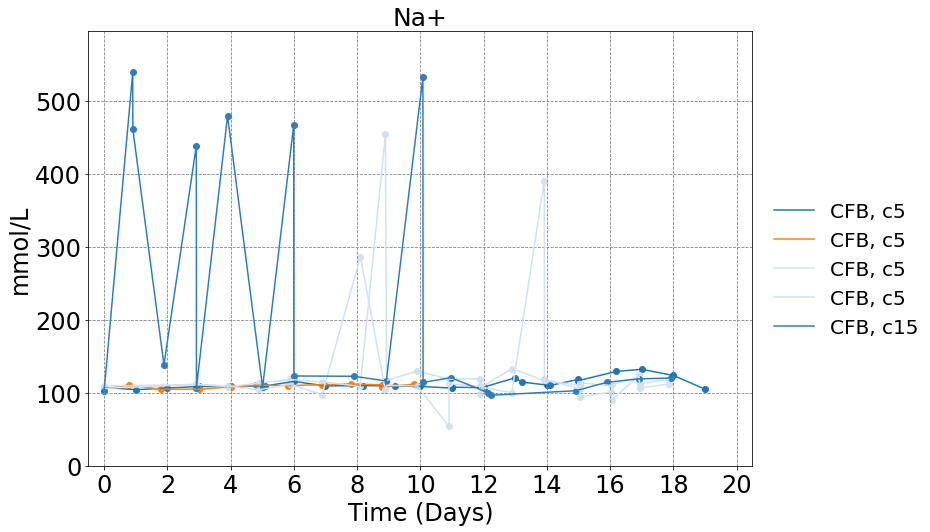

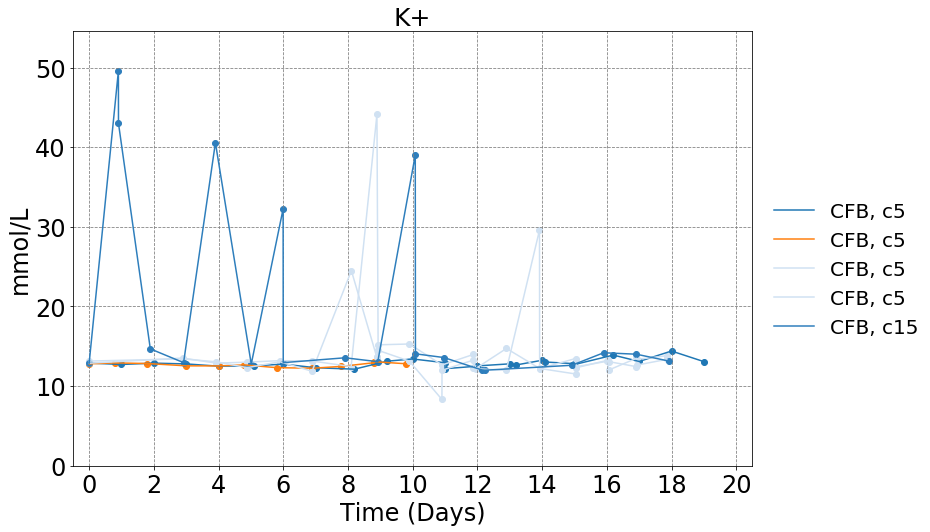

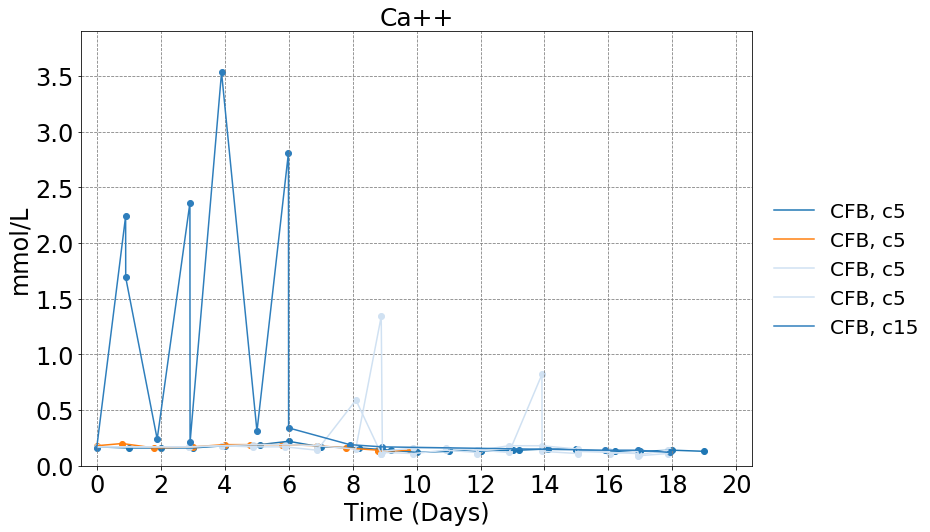

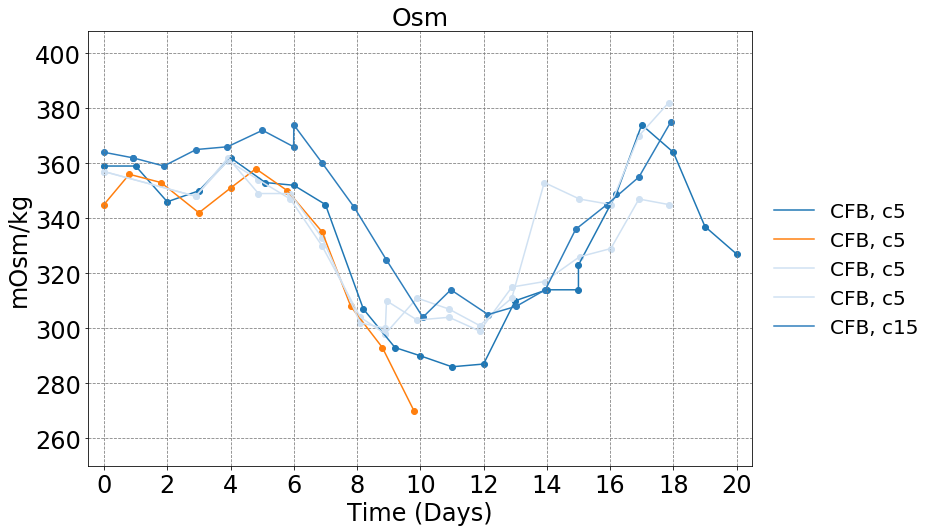

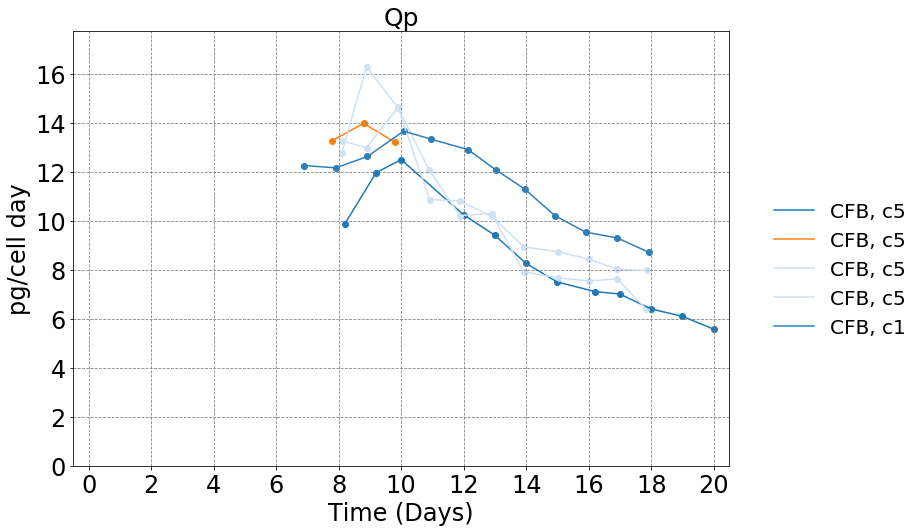

In [12]:
clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
        'Na+', 'K+', 'Ca++', "Osm", 'Qp']

for i in clms_list:
    plot_single(list_BSR, i, df, legend = legend_key_1, color = color_key, xmax = 20)

# Appendix

In [ ]:
df = calc_qp(df)


In [ ]:
import matplotlib.cm #color maps for plots 

In [ ]:
def global_color():
    """
    A function that creates global dictionary with color keys and rgba values to be used
    in plotting. 
    """
    
    grey = matplotlib.cm.get_cmap("Greys")
    purple = matplotlib.cm.get_cmap("Purples")
    blue = matplotlib.cm.get_cmap("Blues")
    green = matplotlib.cm.get_cmap("Greens")
    orange = matplotlib.cm.get_cmap("Oranges")
    red = matplotlib.cm.get_cmap("Reds")

    cmap_dict = {"grey":grey,
                 "purple":purple,
                 "blue":blue,
                 "green":green,
                 "orange":orange,
                 "red":red}

    global color_dict 
    
    color_dict = {}

    for key, value in cmap_dict.items():
        for i in list(range(1,11)):
            color_dict[key+str(i)] = value(i/10)

In [ ]:
global_color()

color_key = {"SF0001":"blue2",
            "SF0002":"blue4",
            "SF0005":"blue6",
            "SF0006":"blue7",
            "SF0009":"blue8",
            "SF0010":"blue9",
            "SF0003":"red2",
            "SF0004":"red4",
            "SF0007":"red6",
            "SF0008":"red7",
            "SF0011":"red8",
            "SF0012":"red9"}

for i in color_key.keys():
    color = color_key[i]
    rgb = color_dict[color]
    
    color_key[i] = rgb

In [ ]:
def plot_2by2(biorx_list, clms_list, df, **kwargs):
    """
    ###INPUTS###
    biorx_list:
        list of bioreactor IDs to be plotted. Must match values in column "Sample ID"

    clms_list:
        list of 3 columns to plot in descending order, 1 plot per column name.

        list of relevant columns to plot:

        clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
                'Na+', 'K+', 'Ca++', "Osm", 'Qp']

    df:
        dataframe must contain columns: "Sample ID", "Runtime", at least 3 from clms_list

    **kwargs:

    legend = dict of {"Sample ID": "legend str"}
        example: {"R0014":"Fed-batch, control"}

    xmax = int or float
        maximum value of the x-axis (days)

    """

    #### plot specifications ###

    # pulling variable from **kwargs
    vari = kwargs.get("legend", None)
    x = kwargs.get("xmax", None)

    # filter data from input list
    df = df[df["Sample ID"].isin(biorx_list)]

    # filter data Runtime by xmax parameter if kwarg exists
    if (type(x) == int) or (type(x) == float):
        df = df[df["Runtime"] < x + 0.5]
    else:
        pass


    # x axis parameters
    xmin = -0.5

    if (type(x) == int) or (type(x) == float):
        xmax = x + 0.5
    else:
        xmax = 14.5

    #### FIGURE ####

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 10))

    for i, ax in enumerate(fig.axes):

        for key, grp in df.groupby(['Sample ID']):
            clm = clms_list[i]  # column name from list, called by enumerated for loop

            ax.scatter(grp['Runtime'], grp[clm], label='_nolegend_', color = color_key[key])  # Point plots
            mask = np.isfinite(grp[clm])  # masking over NaN data (lines dont connect)

            # legend based on **kwarg legend dict presence
            if type(vari) == dict:
                ax.plot(grp['Runtime'][mask], grp[clm][mask], label=(key + " " + vari[key]), color = color_key[key])  # line plots
            else:
                ax.plot(grp['Runtime'][mask], grp[clm][mask], label=(key), color = color_key[key])

        ax.xaxis.set_ticks(np.arange(0, 30, 2))
        ax.set_xlim(left=xmin, right=xmax)  # forcing a zero lower x limit (titer)

        ax.tick_params(axis='both', which='major', labelsize=19)  # tick labels size

        ax.set_ylabel(ylabels[clm], fontsize=19)  # y-axis label

        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

        ax.set_title(clm, fontsize=23)
        ymin, ymax = ax.get_ylim()  # get the min and max of respective axes
        ax.set_ylim(bottom=dict_ymin[clm], top=ymax * 1.05)  # bottom defined by dict per each param, top = max*1.05

    axes[1, 0].set_xlabel("Time (Days)", fontsize=19, fontweight="bold")  # x-axis label manually adding to outer
    axes[1, 1].set_xlabel("Time (Days)", fontsize=19, fontweight="bold")  # x-axis label

    handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, bbox_to_anchor=(0.795, .644), loc="upper left", fontsize=15)
    fig.tight_layout()
    fig.subplots_adjust(right=0.79, wspace=0.15)

    plt.savefig((str(clms_list) + ".png"), dpi=500)


In [ ]:
plot_2by2(list_BSR,['VCD', 'Viability', 'Titer', "Qp"] , df, xmax = 15)

In [ ]:
def plot_3by1(biorx_list, clms_list, df, **kwargs):
    """
###INPUTS###
biorx_list:
    list of bioreactor IDs to be plotted. Must match values in column "Sample ID"

clms_list:
    list of 3 columns to plot in descending order, 1 plot per column name.

    list of relevant columns to plot:

    clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
            'Na+', 'K+', 'Ca++', "Osm", 'Qp']

df:
    dataframe must contain columns: "Sample ID", "Runtime", at least 3 from clms_list

**kwargs:

legend = dict of {"Sample ID": "legend str"}
    example: {"R0014":"Fed-batch, control"}

xmax = int or float
    maximum value of the x-axis (days)

    """

    #### plot specifications ###

    # pulling variable from **kwargs
    vari = kwargs.get("legend", None)
    x = kwargs.get("xmax", None)

    # filter data from input list
    df = df[df["Sample ID"].isin(biorx_list)]

    # filter data Runtime by xmax parameter if kwarg exists

    if (type(x) == int) or (type(x) == float):
        df = df[df["Runtime"] < x + 0.5]
    else:
        pass


    # x axis parameters
    xmin = -0.5

    if (type(x) == int) or (type(x) == float):
        xmax = x + 0.5
    else:
        xmax = 14.5

    #### FIGURE ####

    fig = plt.figure(figsize=(14, 10))

    num = 1
    for i in clms_list:
        # creating a column of 3 subplots
        ax = fig.add_subplot(3, 1, num)
        num += 1

        # iterating over grouped reactor ID
        for key, grp in df.groupby(['Sample ID']):
            ax.scatter(grp['Runtime'], grp[i], label='_nolegend_', color = color_key[key])  # Point plots
            mask = np.isfinite(grp[i]) #plot lines are disconnected if Nan is present, boolean mask nans when plotting

            # legend based on **kwarg dict presence
            if type(vari) == dict:
                ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key + " " + vari[key]), color = color_key[key])  # line plots

            else:
                ax.plot(grp['Runtime'][mask], grp[i][mask], label=(key), color = color_key[key])

        ax.xaxis.set_ticks(np.arange(0, 30, 2)) #forcing ticks, every even value
        ax.set_xlim(left=xmin, right=xmax)  # forcing a zero lower x limit (titer)
        ax.tick_params(axis='both', which='major', labelsize=15)  # tick labels size
        ax.set_ylabel(ylabels[i], fontsize=15)  # y-axis label

        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')

        ax.set_title(i, fontsize=23)

        ymin, ymax = ax.get_ylim()  # get the min and max of respective axes
        ax.set_ylim(bottom=dict_ymin[i], top=ymax * 1.05)  # bottom defined by dict per each param, top = max*1.05

        # adding x-axis on the last subplot
        if num == 4:
            ax.set_xlabel("Time (Days)", fontsize=22, fontweight="bold")  # x-axis label
        else:
            pass

    handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, bbox_to_anchor=(0.7, .644), loc="upper left", fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(right=0.7)

    plt.savefig((str(clms_list) + ".png"), dpi=500)

In [ ]:
plot_3by1(list_BSR,['VCD', 'Viability', 'Titer'], df,xmax = 15)

In [ ]:
def plot_single(biorx_list, clm, df, **kwargs):
    """
    ###INPUTS###
    biorx_list:
        list of bioreactor IDs to be plotted. Must match values in column "Sample ID"

    clms:
        str. name of column to plot.

        list of relevant columns to plot:

        clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
                'Na+', 'K+', 'Ca++', "Osm", 'Qp']

    df:
        dataframe must contain columns: "Sample ID", "Runtime", at least 3 from clms_list

    **kwargs:

    legend = dict of {"Sample ID": "legend str"}
        example: {"R0014":"Fed-batch, control"}

    xmax = int or float
        maximum value of the x-axis (days)

    """

    #### plot specifications ###

    # pulling variable from **kwargs
    vari = kwargs.get("legend", None)
    x = kwargs.get("xmax", None)

    # filter data from input list
    df = df[df["Sample ID"].isin(biorx_list)]

    # filter data Runtime by xmax parameter if kwarg exists
    if (type(x) == int) or (type(x) == float):
        df = df[df["Runtime"] < x + 0.5]
    else:
        pass


    # x axis parameters
    xmin = -0.5

    if (type(x) == int) or (type(x) == float):
        xmax = x + 0.5
    else:
        xmax = 14.5

    #### FIGURE ####

    fig, ax = plt.subplots(figsize=(15, 7.5))

    for key, grp in df.groupby(['Sample ID']):
        # clm = clms_list[i]  # column name from list, called by enumerated for loop

        ax.scatter(grp['Runtime'], grp[clm], label='_nolegend_', color = color_key[key])  # Point plots
        mask = np.isfinite(grp[clm])  # masking over NaN data (lines dont connect)

        # legend based on **kwarg legend dict presence
        if type(vari) == dict:
            ax.plot(grp['Runtime'][mask], grp[clm][mask], label=(key + " " + vari[key]), color = color_key[key])  # line plots
        else:
            ax.plot(grp['Runtime'][mask], grp[clm][mask], label=(key), color = color_key[key])

    ax.xaxis.set_ticks(np.arange(0, 30, 2))
    ax.set_xlim(left=xmin, right=xmax)  # forcing a zero lower x limit (titer)

    ax.tick_params(axis='both', which='major', labelsize=24)  # tick labels size

    ax.set_ylabel(ylabels[clm], fontsize=24)  # y-axis label

    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')

    ax.set_title(clm, fontsize=25)
    ymin, ymax = ax.get_ylim()  # get the min and max of respective axes
    ax.set_ylim(bottom=dict_ymin[clm], top=100)  # bottom defined by dict per each param, top = max*1.05

    ax.set_xlabel("Time (Days)", fontsize=24)  # x-axis label manually adding to outer

    handles, labels = ax.get_legend_handles_labels()

    fig.legend(handles, labels, bbox_to_anchor=(0.70, .8), loc="upper left", fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(right=0.70, wspace=0.15)


    plt.savefig((str(clm) + ".png"), dpi=500, bbox_inches='tight')

In [ ]:
plot_single(list_BSR, "Viability", df, xmax = 15)

In [ ]:
df

In [ ]:
df.to_csv("SFPM_CSV.csv")

In [ ]:
df[df["Viability"].isna()]

In [ ]:
df["Viability"].max()

In [ ]:
df["Viability"].isna()

# Developing Description file import

In [ ]:
import pandas as pd

In [ ]:
cd ~/Desktop/process

In [ ]:
color_legend  = pd.read_csv("color_legend.csv")
legend_key_1 = dict(zip(color_legend["Sample ID"],color_legend["legend_key"]))
color_key = dict(zip(color_legend["Sample ID"],color_legend["color_key"]))

In [ ]:
legend_key_1

In [ ]:
color_key

In [ ]:
color_legend.legend_key

In [ ]:
import math

In [ ]:
math.isnan(color_key["R0001"])

In [ ]:
 if type(color_key["R0001"]) == float:
        print("hey")